# Séries Temporais e Forecasting

Nas próximas duas aulas, vamos explorar os seguintes tópicos em Python:

- 1) Introdução às Séries Temporais
- 2) Series Estacionarias e Não Estacionárias
- 3) Transformações de Séries
- 4) Teste de Dickey_fuller
- 5) Modelo ARIMA
- 6) Modelo SARIMA

<img src="https://miro.medium.com/max/364/1*46jxiV9PiL5omTI9FDoW3Q.png" width=600>

##   

## Introdução às Séries Temporais

Conceito:<br><br>
__Séries temporais__ nada mais é do que um conjunto de dados que foram gravados __sequencialmente__ ao longo de um __período de tempo.__. 

In [1]:
# Caso não tenha instalado as bibliotecas, utilize o código abaixo
#!pip install pandas-datareader
#!pip install plotly==3.7.1
#!pip install statsmodels --upgrade

In [1]:
!pip install pmdarima

In [2]:
# Imports Defaults 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos utilizar os dados climáticos da Índia (presentes em 'clima_india.csv') para ilustrar os primeiros comandos e conceitos

In [4]:
df = pd.read_csv('clima_india.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


<AxesSubplot:>

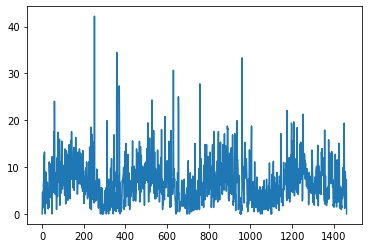

In [7]:
df['wind_speed'].plot()
#df['meantemp'].plot()

In [8]:
#Mundando o tempo para datetime
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [9]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [10]:
# Mundando o índice para as outras features serem séries temporais
df.set_index('date',inplace=True)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


<AxesSubplot:xlabel='date'>

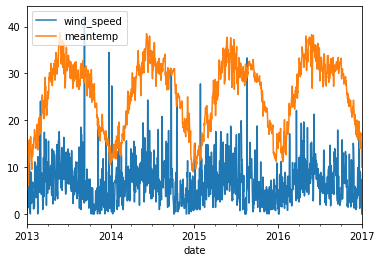

In [14]:
df[['wind_speed','meantemp']].plot()
#df[['meantemp']].plot()
#df[['humidity','meantemp']].plot()
#df[['humidity', 'wind_speed']].plot()

<AxesSubplot:xlabel='date'>

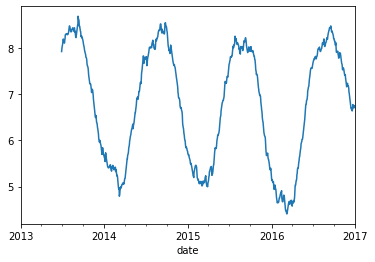

In [15]:
#Médias móveis (para suavizar as variações)
#df['wind_speed'].plot()
df['wind_speed'].rolling(180).mean().plot()

##   

## Componentes da Série Temporal

Uma série temporal pode ser decomposta nos seguintes **componentes**:

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é **crescente**, **decrescente** ou **estável**. Além disso, a tendência indica também a velocidade destas mudanças. 

- **Ciclos (C)**: são  **oscilações de subida e de queda nas séries**, de forma **suave e repetida**, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.

- **Sazonalidade (S)**: são **oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia**. Estes movimentos são facilmente previsíveis, ocorrendo em **intervalos regulares de tempo**. 

- **Ruído Aleatório ($\epsilon$)**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.

Algumas ilustrações:

<img src="https://www.datavedas.com/wp-content/uploads/2018/04/3.1.3.1-Introduction-to-Time-Series-Data-R.jpg" width=600>

<img src="https://i2.wp.com/itfeature.com/wp-content/uploads/2014/06/Component-of-Time-Series-Data.jpg?resize=661%2C599" width=600>


A partir da sazonalidade, pode-se classificar uma série temporal em **aditiva ou multiplicativa**:

- A **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo; 
- A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**

<img src="https://miro.medium.com/max/564/1*LdeXlKrgNkFUjOhnO4Zzaw.jpeg" width=600>

Vamos aos exemplos:

> **Exemplo**: Esta série é referente à quantidade de passageiros na Airline. Note que a tendência também é crescente e sazonal. Com o decorrer do tempo a quantidade de passageiros que viajam pela companhia aérea aumenta (eixo y), porém a periodicidade da sazonalidade continua marcada no gráfico. Trata-se de uma série com sazonalidade multiplicativa. Neste caso, a quantidade de passageiros a cada período sazonal aumenta.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/9a0420ad-f498-4d2e-9a2b-28a224ccbdf5.png" width=600>

> **Exemplo**: No exemplo abaixo é representado a média da temperatura diária em uma determinada cidade ao longo de 1 ano. Note que a série é estável (não possui tendência crescente tampouco decrescente), é sazonal aditiva (possui periodicidade bem marcada e sem grande variação na amplitude).

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/ec935a3f-daf0-4fff-a99f-5bc3c2a906d3.png" width=600>


Para observarmos as componentes acima, podemos utilizar a biblioteca [statsmodels](https://www.statsmodels.org/stable/index.html), que é muito utilizada para a construção de modelos estatísticos.

A função `seasonal_decompose` proporciona a decomposição de séries temporais de forma simples e rápida!

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

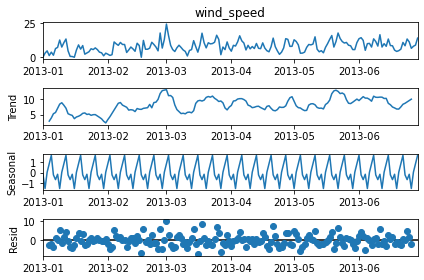

In [17]:
# 'meantemp' 'wind_speed'
comps = seasonal_decompose(df['wind_speed'][:180], model='aditive')
comps.plot()
plt.show()

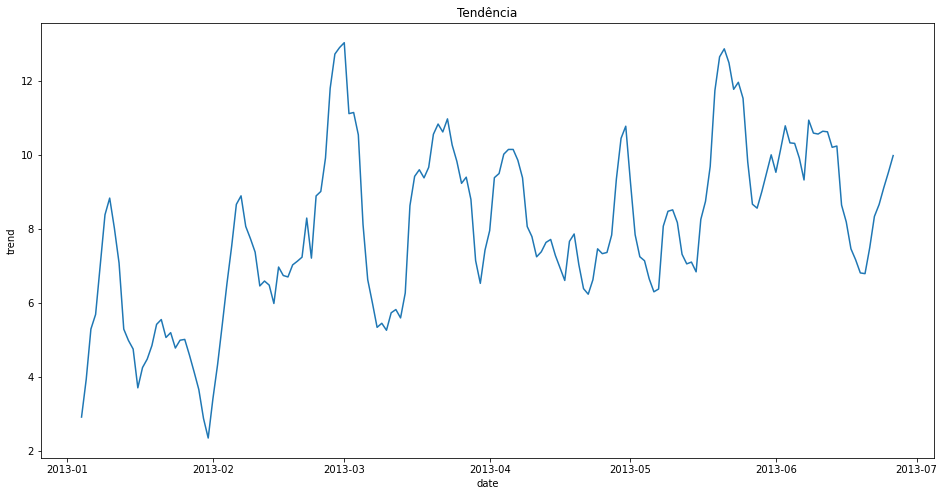

In [18]:
plt.figure(figsize=(16,8))
sns.lineplot(x = comps.trend.index, y = comps.trend)
plt.title('Tendência')
plt.show()

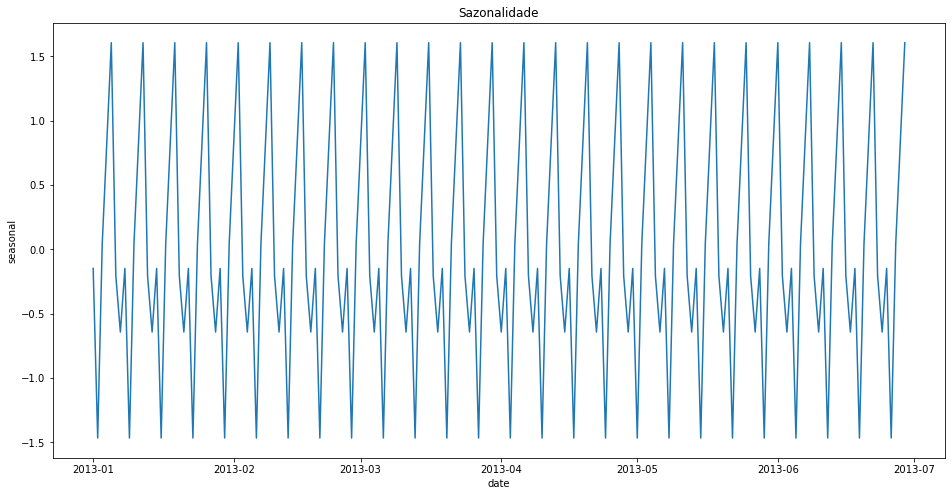

In [19]:
plt.figure(figsize=(16,8))
sns.lineplot(x = comps.seasonal.index, y = comps.seasonal)
plt.title('Sazonalidade')
plt.show()

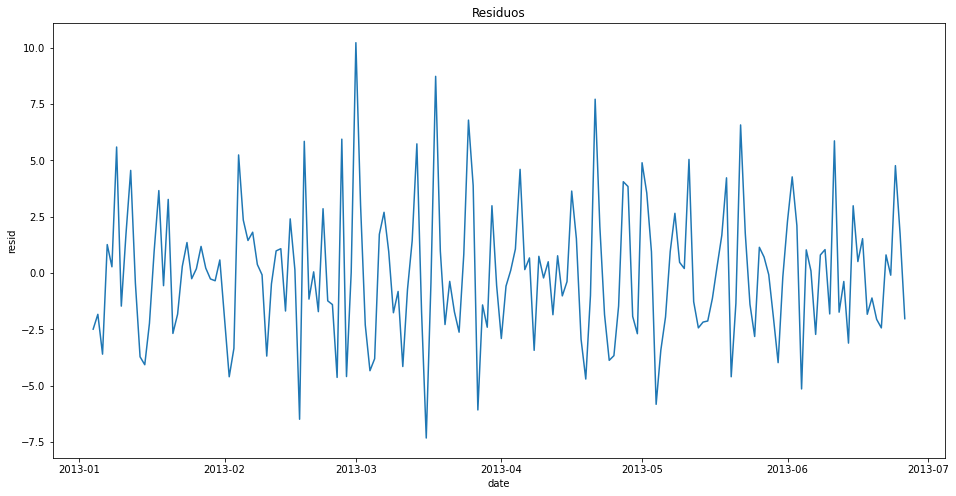

In [20]:
plt.figure(figsize=(16,8))
sns.lineplot(x = comps.resid.index, y = comps.resid)
plt.title('Residuos')
plt.show()

##   

## Forecasting de Séries Temporais

O _Forecasting_ ou Predição de Séries Temporais são as técnicas para desenvolver modelos que interpretem e entendam o __comportamento das séries temporais.__<br><br>

Muito importante ressaltar que antes mesmo de partir para as modelagens diversas que podemos aplicar, vamos entender mais sobre os conceitos de __estacionaridade de séries__ e __transformações de séries.__

##  

## Séries Estacionárias e Não Estacionárias

Antes de falarmos sobre _Forecasting_ ou predição de séries temporais, um requisito essencial é que a série temporal seja __estacionária__. Vamos entender com o gráfico a seguir:

<img src="https://cdn-images-1.medium.com/max/1600/1*U2m5Eq7ScLnf2kG5mnQsKQ.png" width=800>

A diferença entre uma série temporal __estacionária__ e __não estacionária__ é que para as séries estacionárias, o valor de __média__ e __variância__ da série é __constante__ ao longo do tempo, diferente do caso das 'series não estacionárias.<br><br>

<img src="https://miro.medium.com/max/2580/1*tkx0_wwQ2JT7pSlTeg4yzg.png" width=800>
<br>

Uma forma para sabermos de fato se a nossa série temporal condiz com a condição de ser estacionária, utilizaremos um teste de hipótese chamado de __Teste de Dickey-Fuller Aumentado__.

In [21]:
from datetime import datetime, timedelta
import statsmodels
from statsmodels.tsa.stattools import adfuller

<AxesSubplot:xlabel='date'>

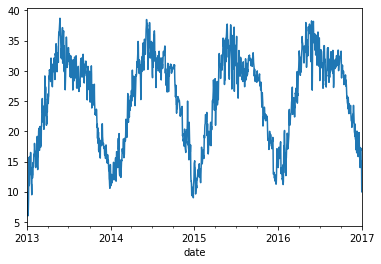

In [22]:
df['meantemp'].plot()
#df['wind_speed'].plot()

In [23]:
y = df['wind_speed'] 
#df['wind_speed'].plot()
#y = df['meantemp']
#df['meantemp'].plot()
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário!')
else:
    print('Não é Estacionário!')

ADF Statistic: -3.838097
p-value: 0.002541
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
É Estacionário!


##   

## Transformação de Séries

Dado que a Série Temporal pode __não ser estacionária__, podemos aplicar algumas transformações que possa auxiliar na manipulação dos nosso dados e assim deixar a série o mais próxima de ser estacionária.<br><br>

[Neste Link](https://people.duke.edu/~rnau/411home.htm) da Duke University, têm-se um guia bem detalhado para os diversos passo a passo em todo o processo de _Time Series Forecasting_, inclusive sobre os tipos de transformações que podem ser feitas:

- Calcular o __log__ de todas as observações:

ADF Statistic: -3.586512
p-value: 0.006024
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
É Estacionário


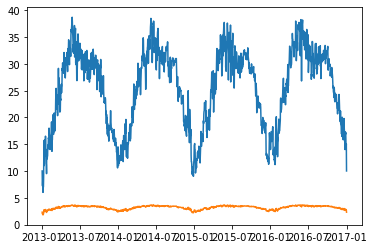

In [24]:
y = df['meantemp']
plt.plot(y)
y = np.log(df['meantemp'])
plt.plot(y)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')


- Calcular a __raiz quadrada__ de todas as observações:

ADF Statistic: -3.071501
p-value: 0.028735
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
É Estacionário


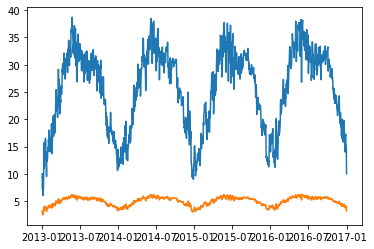

In [25]:
y = df['meantemp']
plt.plot(y)
y = np.sqrt(df['meantemp'])
plt.plot(y)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

- Calcular a __raiz cúbica__ de todas as observações:

ADF Statistic: -3.209657
p-value: 0.019432
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
É Estacionário


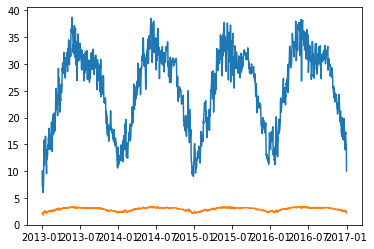

In [26]:
y = df['meantemp']
plt.plot(y)
y = np.cbrt(df['meantemp'])
plt.plot(y)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

<AxesSubplot:xlabel='date'>

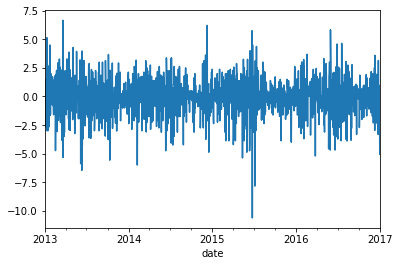

In [27]:
df['meantemp'].diff(1).plot()
#plt.plot(y)

- Utiliza a função do pandas [pct_change()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) e calcula o percentual de  diferença de todas as observações:

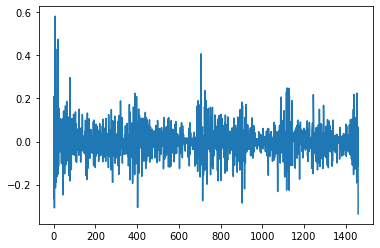

ADF Statistic: -20.404761
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
É Estacionário


In [28]:
y = df['meantemp'].pct_change().dropna().values
plt.plot(y)
plt.show()
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

##   

## Forecasting

Tomados os devidos cuidados com os nossos dados, podemos então partir de fato para o __modelo de previsão/predição__.
<br><br>
Um dos modelos mais conhecidos e utilizado em Série Temporais é o modelo __ARIMA__, onde a sigla significa _AutoRegressive Integrated Moving Average_. Basicamente, o ARIMA é uma composição de técnicas combinadas para utilizarmos dados passados para prever o futuro.
<br><br>
O ARIMA é o modelo mais __completo__ para abordagem de séries temporais, além do fato de usufruir do termo de diferenciação (seria o I na sigla), esse é um modelo que funciona muito bem __mesmo com séries não estacionárias__.
<br><br>
Além do ARIMA, existem outras linhas de modelagem onde podemos aplicar o efeito da sazonalidade (__SARIMA__) e modelos como __AR__, __MA__, __ARMA__ entre outros (lembrando que o ARIMA é uma combinação de técnicas). 

## Modelo ARIMA

Antes de começar a utilizar o ARIMA, vamos definir definir de maneira __objetiva__ o significado de cada um dos termos que definem o ARIMA:

> Modelo Autoregressivo (__AR__) : Capturar e entender o comportamento da série temporal para prever dados futuros com dados do passado;
<br>

<img src="https://i1.wp.com/www.business-science.io/assets/lag-explanation.PNG?w=584" width=400>

<br>

> Diferenciação (__I__): A diferenciação em estatística é uma transformação aplicada aos dados de uma série temporal a fim de tornar esta série estacionária;

<br>

> Média Móvel (__MA__): Envolve modelarmos o erro utilizando dados do passado através de uma média móvel.

Dado então o modelo ARIMA, o que necessita para podermos utilizá-lo?
<br><br>

### Definição dos parâmetros do ARIMA (p, d, q)

Assim como diversos modelos, o ARIMA necessita que a gente defina alguns parâmetros (p, d, q) que estão diretamente correlacionados como os termos da sigla AR, I e MA:
- __p__: número de defasagens autoregressivas
- __d__: ordem da diferença das defasagens
- __q__: número de defasagens das médias móveis
<br><br>

Existe algumas formas de definir esses parâmetros, iremos destacar duas delas como __avaliação através dos gráficos de Autocorrelação e Autocorrelação Parcial__ e __iterativamente__.

##   

### Autocorrelação e Autocorrelação Parcial

Definir os parâmetros a partir dos gráficos de Autocorrelações, pode a priori ser um método __bem simples__, mas dependendo do __comportamento da nossa série temporal__ não é tão simples utilizar. Vamos utilizar as funções _plot_acf_ e _plot_pacf_ para criar o que é chamado também de __gráficos de pirulitos__:

In [36]:
y = df['wind_speed']
#y = df['meantemp']

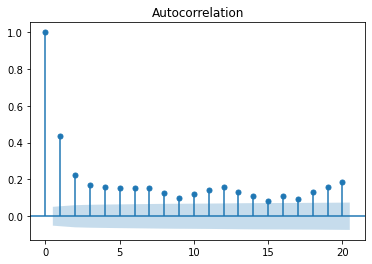

In [37]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y, lags=20)
plt.show()

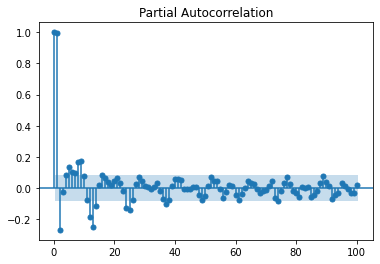

In [182]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(y, lags=100)
plt.show()

Temos abaixo, algumas dicas de como interpretar os gráficos de autocorrelações:


<img src="https://image1.slideserve.com/1710867/slide34-l.jpg" width=800>

Para o caso de modelos ARMA ou ARIMA, onde tem um decaimento exponencial, os parâmetros __p__ e __q__ serão os números de pontos fora da região de confiança para os gráficos de autocorrelação e autocorrelação parcial respectivamente.

##  

### Método Iterativo

O método iterativo funcionaria como um _GridSearch_ onde testaremos exaustivamente diversas combinações de parâmetros para (p, d, q). As principais desvantagens de partir por esse método são __tempo de processamento__ e __não necessariamente todas as combinações de parâmetros vão funcionar no ARIMA__.
<br><br>
Para acompanhar com o melhor resultado para a combinação de parâmetros, iremos utilizar a métrica __AIC__ (_Akaike's Information Criterion_), onde quanto menor o valor melhor a combinação de parâmetros para o ARIMA (o valor de AIC pode ser negativo!):

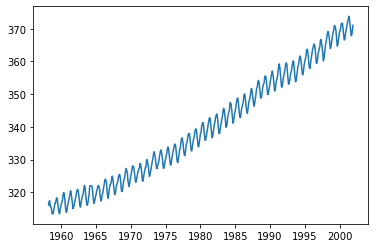

In [38]:
import statsmodels.api as sm

data = sm.datasets.co2.load_pandas()


y = data.data
y = y['co2'].resample('MS').mean()

# A função bfill preenche os NaNs com o valor da observação anterior
y = y.fillna(y.bfill())

y.describe

plt.plot(y)

In [39]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

ls_ar, ls_i, ls_ma, ls_aic = [], [], [], []

#i = 1
for ar in range(0, 3):
    for ma in range(0, 3):
        for i in range(0,3):
            model = statsmodels.tsa.arima.model.ARIMA(y, order = (ar, i, ma))

            arima = model.fit()

            ls_ar.append(ar)
            ls_i.append(i)
            ls_ma.append(ma)
            ls_aic.append(arima.aic)


In [40]:
df_ic = pd.DataFrame({'AR': ls_ar, 
                      'I': ls_i,
                      'MA': ls_ma,
                      'AIC': ls_aic})


p = df_ic.sort_values(['AIC']).iloc[0,0]
d = df_ic.sort_values(['AIC']).iloc[0,1]
q = df_ic.sort_values(['AIC']).iloc[0,2]
df_ic.sort_values(['AIC'])

,AR,I,MA,AIC
22,2,1,1,1075.977973
25,2,1,2,1076.745197
19,2,1,0,1205.443096
23,2,2,1,1208.722623
16,1,1,2,1222.822494
26,2,2,2,1224.030646
24,2,0,2,1234.461730
7,0,1,2,1250.590207
15,1,0,2,1263.070550
13,1,1,1,1267.202007


In [41]:
print(f'A melhor combinação de parâmetros para esse caso foi (p, d, q) = ({p}, {d}, {q})')

A melhor combinação de parâmetros para esse caso foi (p, d, q) = (2, 1, 1)


In [42]:
# Treinando o modelo ARIMA
mod = statsmodels.tsa.arima.model.ARIMA(y, order = (p, d, q))

arima = mod.fit()
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  526
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -533.989
Date:                Wed, 06 Apr 2022   AIC                           1075.978
Time:                        19:33:31   BIC                           1093.032
Sample:                    03-01-1958   HQIC                          1082.656
                         - 12-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5353      0.028     55.566      0.000       1.481       1.589
ar.L2         -0.8285      0.030    -27.249      0.000      -0.888      -0.769
ma.L1         -0.8117      0.037    -21.901      0.0

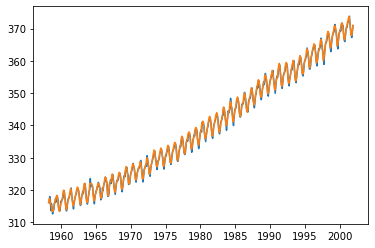

In [43]:
#Reproduzindo os dados com o modelo treinado
plt.plot(arima.predict()[1:])
plt.plot(y)
plt.show()

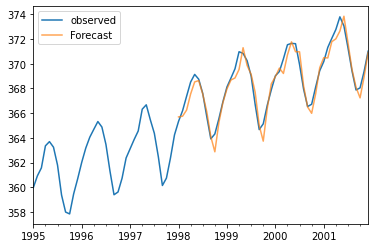

In [53]:
#... reproduzindo os resultados
ax = y['1995':].plot(label='observed') #intervalo dos dados reais
#start = período inicial para a previsão
pred = arima.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)


#Plottando os gráficos
pred.predicted_mean.plot(label='Forecast', alpha=.7)


plt.legend()
plt.show()

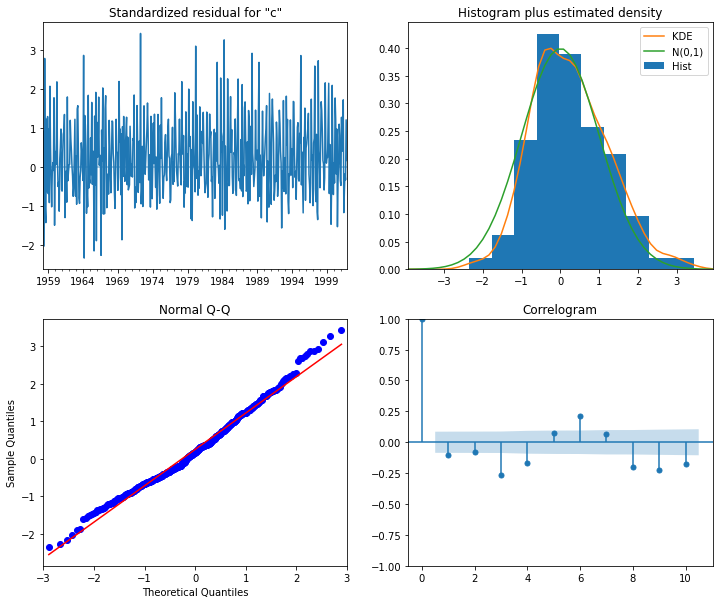

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  526
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -533.989
Date:                Wed, 06 Apr 2022   AIC                           1075.978
Time:                        19:35:36   BIC                           1093.032
Sample:                    03-01-1958   HQIC                          1082.656
                         - 12-01-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5353      0.028     55.566      0.000       1.481       1.589
ar.L2         -0.8285      0.030    -27.249      0.000      -0.888      -0.769
ma.L1         -0.8117      0.037    -21.901      0.000      -0.884      -0.739
sigma2         0.4458      0.026     17.040      0.000       0.395       0.497
===================================================================================
Ljung-Box (L1) (Q):                   5.44   Jarque-Bera (JB):                13.62
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.39
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
#Analisando o resíduo do modelo
arima.plot_diagnostics(figsize=(12,10))

plt.show()

arima.summary()

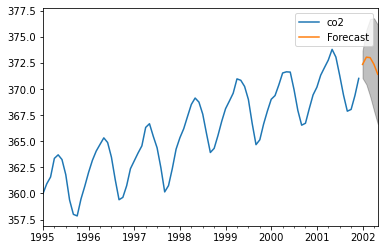

In [54]:
ax = y['1995':].plot()
pred_uc_arima = arima.get_forecast(steps=5)
pred_ci_arima = pred_uc_arima.conf_int()

ax.fill_between(pred_ci_arima.index,
                pred_ci_arima.iloc[:, 0],
                pred_ci_arima.iloc[:, 1], color='k', alpha=.25)

pred_uc_arima.predicted_mean.plot(label = 'Forecast')

plt.legend()

##   

## Modelo SARIMA

O modelo __SARIMA__ funciona analogamente ao modelo ARIMA, onde além dos parâmetros do ARIMA, iremos passar alguns parâmetros para a Sazonalidade:

In [55]:
import statsmodels.api as sm

Iremos utilizar um dataset do _statsmodels_ sobre emissão de C02:

In [56]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [57]:

y = y['co2'].resample('MS').mean()

# A função bfill preenche os NaNs com o valor da observação anterior
y = y.fillna(y.bfill())

In [58]:
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

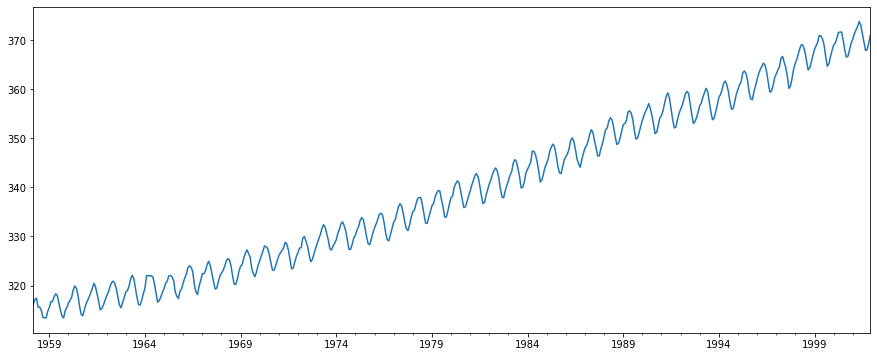

In [59]:
# Representação do Histórico
y.plot(figsize=(15, 6))
plt.show()

In [51]:
import itertools

# Define os parametros p, d e q como valores entre 0 e 2
p = d = q = range(0, 2)

# Gera as diferentes combinações
pdq = list(itertools.product(p, d, q))

# Gera as combinações para a sazonalidade (12 significa uma sazonalidade mensal)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Exemplos de Combinações para o SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de Combinações para o SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [52]:
import warnings
warnings.filterwarnings("ignore") 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:6787.343624034833
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1854.8282341411793
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1596.7111727643291
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1058.938892132006
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1056.2878496431083
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1361.6578977897923
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1044.7647912825396
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:6881.048755448089
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:6072.6623268159
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1379.1941066950997
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1241.417471687193
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1129.6214098574483
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:780.4315762409735
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1119.5957893636828
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:807.0912987525369
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1675.808692302429
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1240.2211199194035
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:633.

A melhor combinação para o SARIMA foi os parâmetros (1, 1, 1) e parâmetros da sazonalidade como (1, 1, 1, 12) com um valor de AIC igual a algo em torno de 278.

In [60]:
# Definição e FIt do Modelo
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)


results = mod.fit()


In [61]:
# Calcula as predições a partir de 1998
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int() #Inertevalo de confiança

In [62]:
pred_ci

,lower co2,upper co2
1998-01-01,364.453367,365.675247
1998-02-01,365.373491,366.595372
1998-03-01,366.404728,367.626608
1998-04-01,367.908489,369.130368
1998-05-01,368.389507,369.611386
1998-06-01,367.802539,369.024418
1998-07-01,366.481974,367.703853
1998-08-01,364.754322,365.976201
1998-09-01,363.200068,364.421947
1998-10-01,363.378464,364.600343


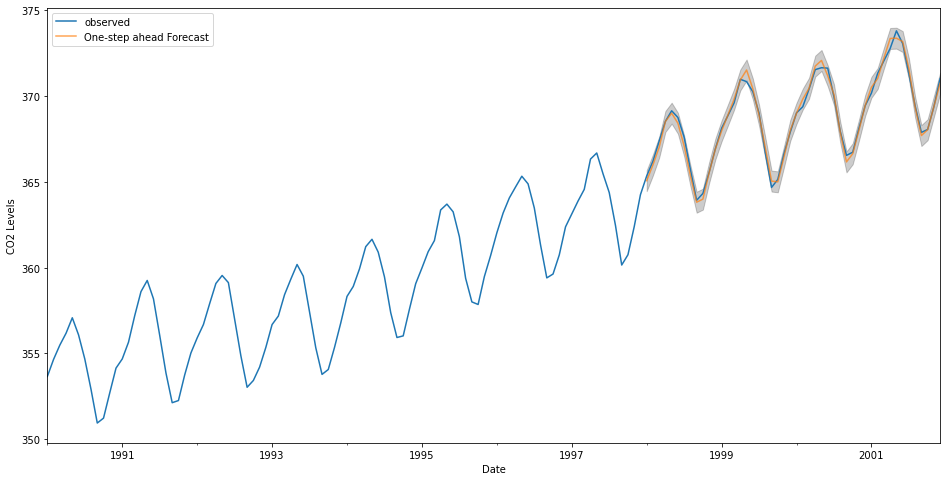

In [63]:
# Plot com o Forecasting

plt.figure(figsize=(16,8))

ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [64]:
#Vamos fazer 200 predições futuras
pred_uc = results.get_forecast(steps=200)

# Define o intervalo de confiança para o Forecasting
pred_ci = pred_uc.conf_int()

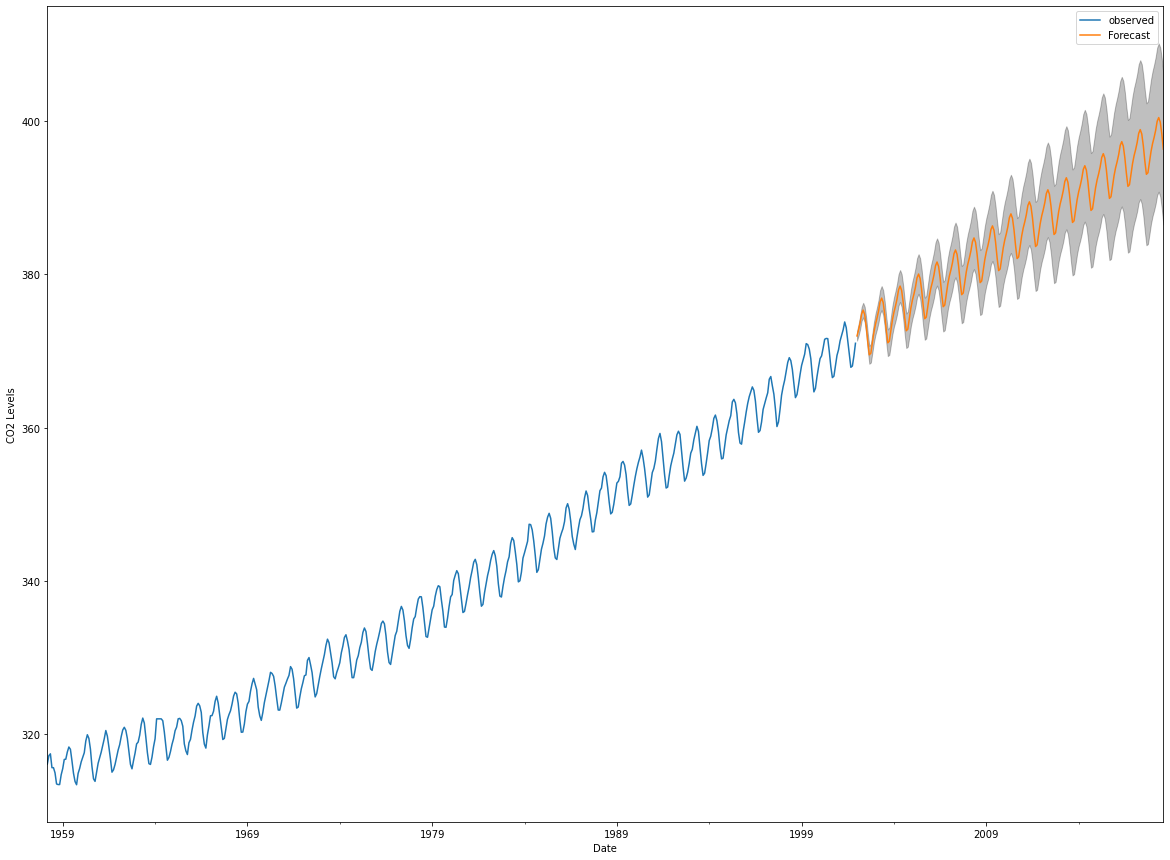

In [65]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

##   

## Exercícios

##   

__1)__ Baixe os dados para as ações da Cielo (CIEL3.SA) (utilize os últimos 50 valores) e verifique se a série temporal é estacionária ou não. Caso não, verifique se alguma transformação torna essa série estacionária (faça isso para todas as features). Faço o mesmo para um período acima de 2 anos (escolha livre). 

##   

__2)__ Utilizando o dataset do exercício anterior, utilize o modelo ARIMA para fazer a previsão dos dados de Fechamento.

##   